<a href="https://colab.research.google.com/github/Tenisha5132/blindsqli_challenge_making/blob/main/Day_01_Burnout_Breakdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
#load Dataset
df = pd.read_csv('/content/mental_health_workplace_survey.csv')

df #howing the data

# Shape of the dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()

#missing values
df.isnull().sum()
# Check total missing values per column
df.isnull().sum().sort_values(ascending=False)
#handling missing values

#handling Numerical Columns(integers and floats) => Fill with Median
#Select numeric columns (both int64 and float64)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Loop through each numeric column
for col in numeric_cols:
    median_val = df[col].median()  # Calculate the median
    df[col].fillna(median_val, inplace=True)  # Fill missing values with median
    print(f"Filled missing values in '{col}' with median: {median_val}")

#handling Categorical Columns(strings/objects) => Fill with Mode
# Select categorical columns (dtype = object)
categorical_cols = df.select_dtypes(include=['object']).columns

#Loop through each categorical column
for col in categorical_cols:
    mode_val = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode_val, inplace=True)  # Fill missing values with mode
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

#OUTLIERS
# Visualize outliers using boxplots
# Columns to visually inspect
features = ['Work_hrs_per_day', 'Sleep_hours', 'Stress_level']

# Plot boxplots
for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.show()


# Dto remove outliers using the IQR method
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_count = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_count - df.shape[0]
    print(f"IQR Method → {removed} outliers removed from '{col}'")
    return df

# Apply IQR method to selected numeric features
for col in ['Work_hrs_per_day', 'Sleep_hours', 'Stress_level']:
    df = remove_outliers_iqr(df, col)

#EDA VISUALIZATION
#Burnout counts
sns.countplot(x='Burnout', data=df)
plt.title("Burnout Distribution")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


#Boxplot: Stress Level by Burnout Status
#This shows how stress levels differ between people who report burnout (1) and those who don't (0).
#Helps reveal whether burnout is associated with higher stress levels.
plt.figure(figsize=(6, 4))
sns.boxplot(x='Burnout', y='stress_level', data=df, palette='Pastel1')
plt.title("Stress Level by Burnout Status")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Stress Level")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Boxplot: Sleep Hours by Burnout Status
#Compares how much sleep individuals with and without burnout are getting.
#Useful to see if sleep deprivation may be a contributing factor.
plt.figure(figsize=(6, 4))
sns.boxplot(x='Burnout', y='sleep_hours', data=df, palette='Set3')
plt.title("Sleep Hours by Burnout Status")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Sleep Hours")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#Scatter Plot: Mental Health Score vs Burnout Score (Colored by Mental Health Condition)
#Shows whether people with mental health issues tend to have higher burnout scores.
#Each point is a respondent; color indicates whether they reported a mental health condition.
sns.scatterplot(data=df, x='mental_health_score', y='burnout_score',
                hue='mental_health_condition', palette='viridis', alpha=0.7)
plt.title("Mental Health Score vs Burnout Score")
plt.xlabel("Mental Health Score")
plt.ylabel("Burnout Score")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#Scatter Plot: Work Hours vs Stress Level (Colored by Remote Work Status)
#Explores whether remote workers experience less stress despite long hours.
#Points are colored based on whether the person works remotely or not.
sns.scatterplot(data=df, x='work_hrs_per_day', y='stress_level', hue='remote_work',
                palette='Set1', alpha=0.7)
plt.title("Work Hours vs Stress Level (by Remote Work)")
plt.xlabel("Work Hours per Day")
plt.ylabel("Stress Level")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Mental Health Benefits vs Burnout
sns.countplot(x='Burnout', hue='benefits', data=df, palette='Set3')
plt.title("Burnout by Mental Health Benefits Availability")
plt.show()

#Save cleaned dataset for later use
df.to_csv("cleaned_burnout_dataset.csv", index=False)
print("Cleaned dataset saved successfully.")


Total Rows: 3000
Total Columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  Physi

ValueError: Could not interpret value `Work_hrs_per_day` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x150 with 0 Axes>

Total Rows: 3000
Total Columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  Physi

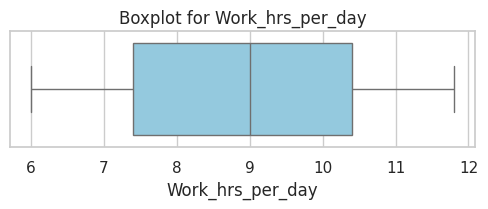

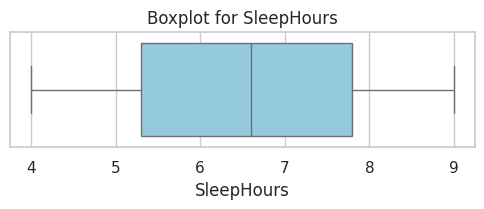

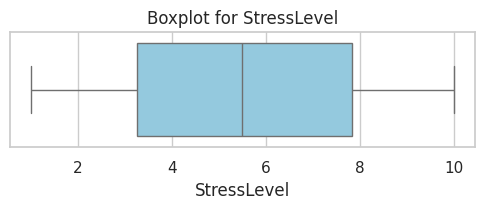

IQR Method → 0 outliers removed from 'Work_hrs_per_day'
IQR Method → 0 outliers removed from 'SleepHours'
IQR Method → 0 outliers removed from 'StressLevel'


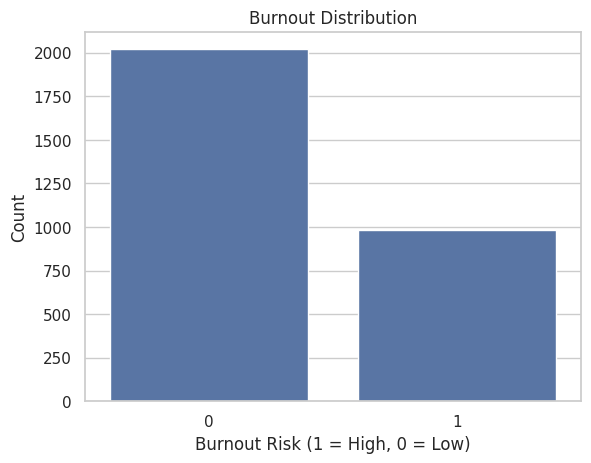

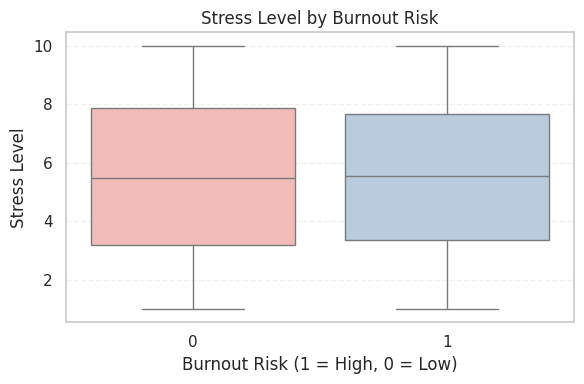

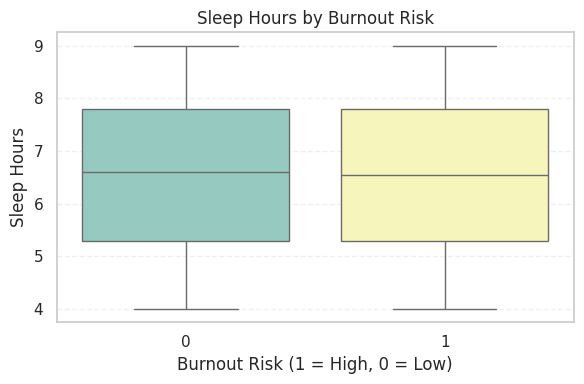

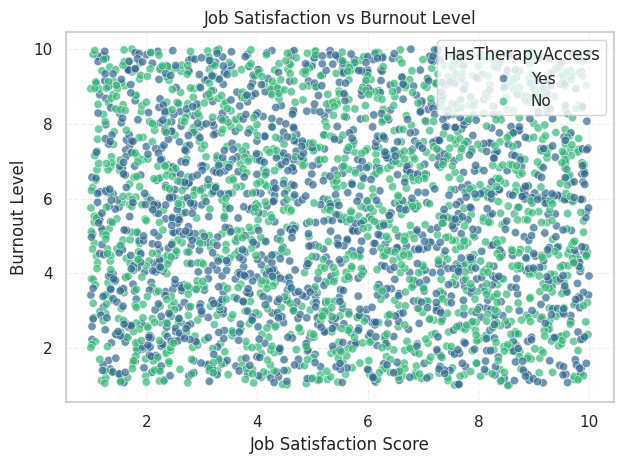

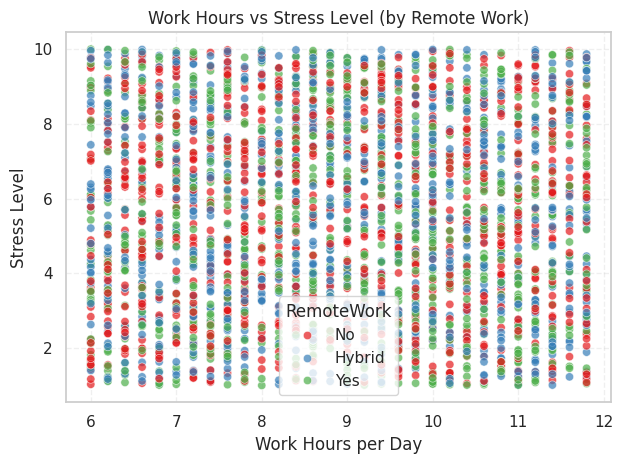

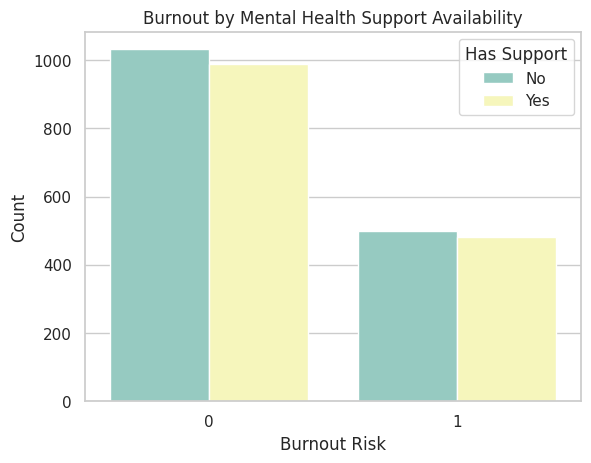

✅ Cleaned dataset saved successfully.


In [4]:
#Import required libraries
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

#Load Dataset
df = pd.read_csv('/content/mental_health_workplace_survey.csv')

#Basic info
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
df.info()
df.describe()

#Check missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

#Handling Missing Values

# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in '{col}' with median: {median_val}")

#Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

#Create derived column for daily work hours (from weekly)
df['Work_hrs_per_day'] = df['WorkHoursPerWeek'] / 5

#Outlier Detection with Boxplots
features = ['Work_hrs_per_day', 'SleepHours', 'StressLevel']
for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.show()

#Function to remove outliers using IQR
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    original_count = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_count - df.shape[0]
    print(f"IQR Method → {removed} outliers removed from '{col}'")
    return df

#Apply IQR method to key numeric features
for col in ['Work_hrs_per_day', 'SleepHours', 'StressLevel']:
    df = remove_outliers_iqr(df, col)

#Exploratory Data Analysis (EDA)

#Burnout Distribution
sns.countplot(x='BurnoutRisk', data=df)
plt.title("Burnout Distribution")
plt.xlabel("Burnout Risk (1 = High, 0 = Low)")
plt.ylabel("Count")
plt.show()

#Stress Level by Burnout Risk
plt.figure(figsize=(6, 4))
sns.boxplot(x='BurnoutRisk', y='StressLevel', data=df, palette='Pastel1')
plt.title("Stress Level by Burnout Risk")
plt.xlabel("Burnout Risk (1 = High, 0 = Low)")
plt.ylabel("Stress Level")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Sleep Hours by Burnout Risk
plt.figure(figsize=(6, 4))
sns.boxplot(x='BurnoutRisk', y='SleepHours', data=df, palette='Set3')
plt.title("Sleep Hours by Burnout Risk")
plt.xlabel("Burnout Risk (1 = High, 0 = Low)")
plt.ylabel("Sleep Hours")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Mental Health Score vs Burnout Level (colored by Therapy Access)
sns.scatterplot(data=df, x='JobSatisfaction', y='BurnoutLevel',
                hue='HasTherapyAccess', palette='viridis', alpha=0.7)
plt.title("Job Satisfaction vs Burnout Level")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Burnout Level")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Work Hours vs Stress Level (Colored by Remote Work Status)
sns.scatterplot(data=df, x='Work_hrs_per_day', y='StressLevel', hue='RemoteWork',
                palette='Set1', alpha=0.7)
plt.title("Work Hours vs Stress Level (by Remote Work)")
plt.xlabel("Work Hours per Day")
plt.ylabel("Stress Level")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#Burnout by Mental Health Benefits Availability
sns.countplot(x='BurnoutRisk', hue='HasMentalHealthSupport', data=df, palette='Set3')
plt.title("Burnout by Mental Health Support Availability")
plt.xlabel("Burnout Risk")
plt.ylabel("Count")
plt.legend(title="Has Support")
plt.show()

#Save Cleaned Data
df.to_csv("cleaned_burnout_dataset.csv", index=False)
print("✅ Cleaned dataset saved successfully.")
